## 0. MNIST data (*)

In the whole exercise, we will work with the famous MNIST dataset. Start by installing ```tensorflow``` to your pipenv if you haven't already. Import ```keras``` from tensorflow and load the dataset using ```keras.mnist.load_data()```.

Check help() on ```keras.mnist.load_data``` and read to find out how to unpack the data properly. 

In [1]:
from tensorflow import keras
import numpy as np
import ssl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
import cv2
from PIL import Image

ssl._create_default_https_context = ssl._create_unverified_context

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

b) Check the shapes of X_train, X_test, y_train, y_test. What does each dimension mean?

In [3]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

x_train: uint8 NumPy array of grayscale image data with shapes (60000, 28, 28), containing the training data. Pixel values range from 0 to 255.

y_train: uint8 NumPy array of digit labels (integers in range 0-9) with shape (60000,) for the training data.

x_test: uint8 NumPy array of grayscale image data with shapes (10000, 28, 28), containing the test data. Pixel values range from 0 to 255.

y_test: uint8 NumPy array of digit labels (integers in range 0-9) with shape (10000,) for the test data.

In other words: x_train and x_test contains 60000 "pictures" with 28 x 28 pixels (with pixel values between 0 and 255)
y_train and y_test gives the correct answer (values 0-9) for each picture.

c) How many images are there in X_train?

60000 images

d) Check smallest and largest value of a sample image of your choice. What do these numbers in the matrix represent? Plot this image using ```plt.imshow()``` and set cmap to "gray" to get the correct representation of the grayscale image.

In [4]:
print(X_train[1].min()) # Meaning the darkest black
print(X_train[1].max()) # Meaning the whitest white

0
255


A value close to 0 is a black colour and a value close to 255 is a white colour. Values in between are different shades of grey.

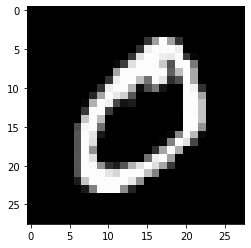

In [5]:
plt.imshow(X_train[1], cmap="gray")

e) Plot 20 sample images. 

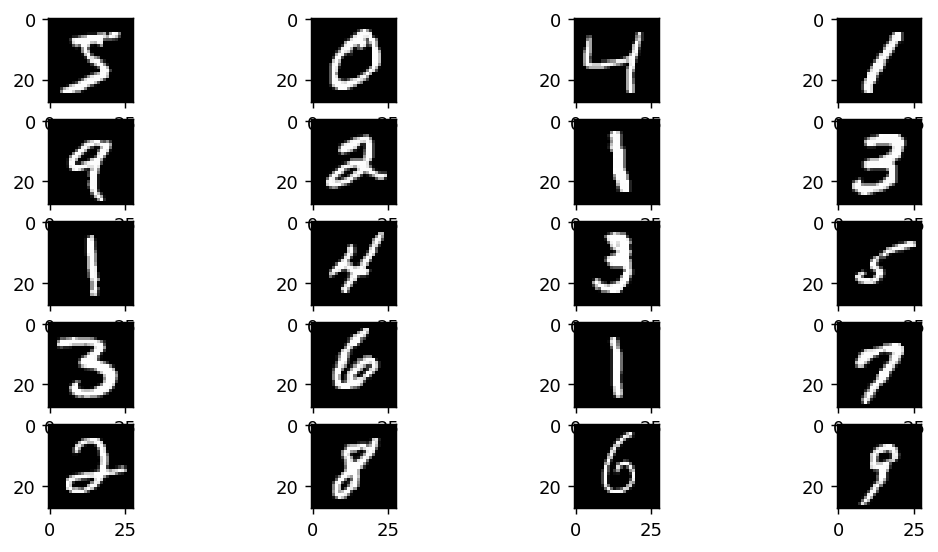

In [6]:
fig, axes = plt.subplots(5, 4, figsize=(10, 5), dpi=130)

for i, ax in enumerate(axes.flatten()):
    ax.imshow(X_train[i], cmap="gray")

f) When you checked the shapes of the data you noticed that X_train, X_test are 3D tensors (generalization of a matrix to more dimensions). However KNN classifier in scikit-learn requires a 2D tensor or a matrix. Reshape X_train and X_test to appropriate shapes. 

In [7]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [8]:
X_train = np.reshape(X_train, (60000, 28*28))
X_test = np.reshape(X_test, (10000, 28*28))
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

## 1. Train|test|validation split (*)

As you already have training data and testing data, do a split on the training data to get validation data. The validation data will be used for tuning $k$ number of neighbors for KNN. I used 0.16 for validation as it is close to 1/6 to get around 10000 validation samples.


In [9]:
X_train_reduced, X_val, y_train_reduced, y_val = train_test_split(X_train, y_train, test_size=0.16, random_state=42)
X_train_reduced.shape, X_val.shape, y_train_reduced.shape, y_val.shape

((50400, 784), (9600, 784), (50400,), (9600,))

## 2. Hyperparameter tuning (*)

Train the models for a set of $k$-values using the training data and make predictions on validation data. Plot the validation accuracy against different $k$-values. Based on your plot, which $k$ do you choose? 

In [10]:
accuracy_scores = []

for k in range(1, 10):
    model_KNN = KNeighborsClassifier(n_neighbors=k)
    model_KNN.fit(X_train_reduced, y_train_reduced)
    y_pred = model_KNN.predict(X_val)
    accuracy = accuracy_score(y_pred, y_val)
    accuracy_scores.append(accuracy)

In [11]:
accuracy_scores

[0.9751041666666667,
 0.9639583333333334,
 0.9727083333333333,
 0.9715625,
 0.9721875,
 0.9703125,
 0.9701041666666667,
 0.9691666666666666,
 0.9690625]

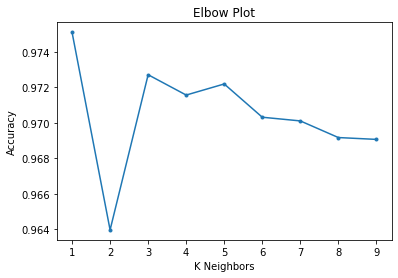

In [12]:
fig, ax = plt.figure(), plt.axes()

ax.plot(range(1, 10), accuracy_scores, ".-")
_ = ax.set(title="Elbow Plot", xlabel="K Neighbors", ylabel="Accuracy")

k = 1 has the highest accuracy.

## 3. Train and predict (*)

Now train the KNN model using the $k$ value you have chosen. Don't waste any training samples, so use all the original 60000 of the X_train for training the KNN model. Predict on the test data. 

a) Do a classification report and based on the report, can you figure out which number had highest proportions of false negatives. False negative in this case means that the true label is $i$ but the model predicted not $i$.  

In [13]:
model_KNN = KNeighborsClassifier(n_neighbors=1)
model_KNN.fit(X_train, y_train)
y_pred = model_KNN.predict(X_test)

In [14]:
accuracy = accuracy_score(y_pred, y_test)
accuracy

0.9691

In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.97      0.99      0.98      1135
           2       0.98      0.96      0.97      1032
           3       0.96      0.96      0.96      1010
           4       0.97      0.96      0.97       982
           5       0.95      0.96      0.96       892
           6       0.98      0.99      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.98      0.94      0.96       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



The number that has the highest number of false negatives (lowest value for recall) is 8. 

b) Plot a confusion matrix, does this confirm your answer in a?

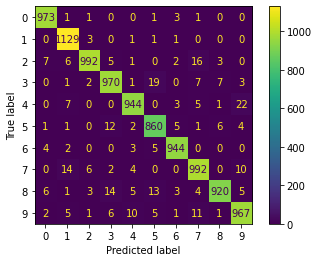

In [16]:
cm = confusion_matrix(y_test, y_pred) 
ConfusionMatrixDisplay(cm).plot()

Reading the confusion matrix rowwise, it seems to confirm my answer in a. The true number 8 seems to have been predicted incorrectly more times than the other numbers (but we should do a proper calculation for this, since it also depends on the number of total pictures for each number).

c) Compute the number of misclassifications for each number. Which number had most misclassifications, do you have any suggestions on why this would be the case?

In [17]:
total_per_number = np.bincount(y_test)

for number in range(10):
    print(f"{number}: {total_per_number[number]}")

0: 980
1: 1135
2: 1032
3: 1010
4: 982
5: 892
6: 958
7: 1028
8: 974
9: 1009


In [18]:
total_per_number

array([ 980, 1135, 1032, 1010,  982,  892,  958, 1028,  974, 1009])

In [19]:
cm

array([[ 973,    1,    1,    0,    0,    1,    3,    1,    0,    0],
       [   0, 1129,    3,    0,    1,    1,    1,    0,    0,    0],
       [   7,    6,  992,    5,    1,    0,    2,   16,    3,    0],
       [   0,    1,    2,  970,    1,   19,    0,    7,    7,    3],
       [   0,    7,    0,    0,  944,    0,    3,    5,    1,   22],
       [   1,    1,    0,   12,    2,  860,    5,    1,    6,    4],
       [   4,    2,    0,    0,    3,    5,  944,    0,    0,    0],
       [   0,   14,    6,    2,    4,    0,    0,  992,    0,   10],
       [   6,    1,    3,   14,    5,   13,    3,    4,  920,    5],
       [   2,    5,    1,    6,   10,    5,    1,   11,    1,  967]])

In [20]:
column = 0
for row in range(10):
    print(f"True label {row} was missclassified {total_per_number[row] - cm[row][column]} times")
    column += 1

True label 0 was missclassified 7 times
True label 1 was missclassified 6 times
True label 2 was missclassified 40 times
True label 3 was missclassified 40 times
True label 4 was missclassified 38 times
True label 5 was missclassified 32 times
True label 6 was missclassified 14 times
True label 7 was missclassified 36 times
True label 8 was missclassified 54 times
True label 9 was missclassified 42 times


I would guess that the reason why 8 is missclassified so often is because it shares a lot of features with the other numbers and the shape is very complex. 0 and 1 have shapes that are very simple and are also more often correctly classified. 

## 4. Predict your own handwriting (**)

Use a software of your choice to draw a digit, make sure the image size is 28x28 pixels or you have to downscale it. You could also take a photo of a handwritten image, if you scale it properly. Read your image using ```matplotlib.image.imread()```. You will have to convert it into grayscale and scale it to be in same scale as the dataset your model has been trained on. Predict on your digit, was it correct? If not, what could the reason be, and is there something that could be done on preprocessing your image? 

In [21]:
file_names = [str(i) for i in range(10)] # Values 1-9 as str
file_names.extend(["5_second", "7_second", "7_third"]) # New versions of 5 and 7

real_numbers = [i for i in range(10)] 
real_numbers.extend([5, 7, 7])

Below are all the numbers I have drawn. The model was not good at classifying my 5:s and 7:s and therefore I drew some extra pictures of them. 

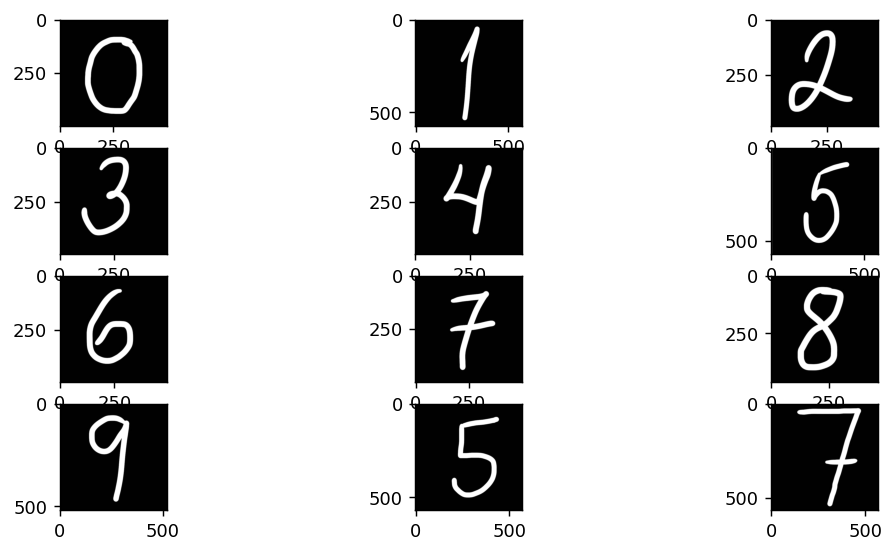

In [22]:
fig, axes = plt.subplots(4, 3, figsize=(10, 5), dpi=130)

for ax, file_name in zip(axes.flatten(), file_names):
    
    image = cv2.imread(f"Data/Numbers/{file_name}.jpg", cv2.IMREAD_GRAYSCALE) #Read it as grayscale (this drops two of the dimensions that coloured pictures have and leaves one pixel channel) 
    ax.imshow(image, cmap="gray")

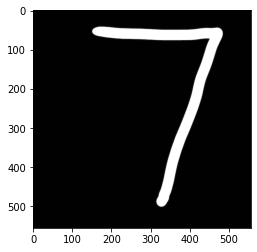

In [23]:
plt.imshow(cv2.imread("Data/Numbers/7_third.jpg", cv2.IMREAD_GRAYSCALE), cmap="gray")

Below I will try the model on my drawn numbers. I will try out four different ways to load the data and do some manipulations on it. 

#### 1. Applying IMREAD_GRAYSCALE when Reading the Data

In [24]:
for file_name, real_number in zip(file_names, real_numbers):
    
    image = cv2.imread(f"Data/Numbers/{file_name}.jpg", cv2.IMREAD_GRAYSCALE) #Read it as grayscale (this drops two of the dimensions that coloured pictures have and leaves one pixel channel) 
    image = cv2.resize(image, (28, 28)) # Resize to 28*28 pixels
    image = np.asarray(image) # Saves the pixel intensity values as an np.array

    image = image.reshape((28*28,))
    image = image.reshape(1, -1)

    predicted_number = model_KNN.predict(image)
    print(f"Real Number: {real_number} Predicted Number: {predicted_number[0]}")

Real Number: 0 Predicted Number: 0
Real Number: 1 Predicted Number: 1
Real Number: 2 Predicted Number: 2
Real Number: 3 Predicted Number: 3
Real Number: 4 Predicted Number: 4
Real Number: 5 Predicted Number: 9
Real Number: 6 Predicted Number: 6
Real Number: 7 Predicted Number: 1
Real Number: 8 Predicted Number: 8
Real Number: 9 Predicted Number: 9
Real Number: 5 Predicted Number: 3
Real Number: 7 Predicted Number: 4
Real Number: 7 Predicted Number: 7


Missclassified: \
5 (all times) \
7 (only correctly classified the last times) 

Below is an example of how the 5 looks (for comparison with the fives below)

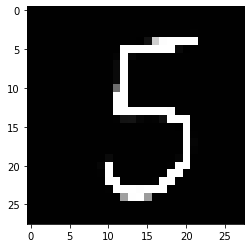

In [25]:
image = cv2.imread(f"Data/Numbers/5_second.jpg", cv2.IMREAD_GRAYSCALE) #Read it as grayscale (this drops two of the dimensions that coloured pictures have and leaves one pixel channel) 
image = cv2.resize(image, (28, 28)) 
plt.imshow(image, cmap="gray")

#### 2. Applying a Threshold to Make the Picture Completely Black and White (No Gray)

In [26]:
for file_name, real_number in zip(file_names, real_numbers):

    image = cv2.imread(f"Data/Numbers/{file_name}.jpg", cv2.IMREAD_GRAYSCALE) #Read it as grayscale (this drops two of the dimensions that coloured pictures have and leaves one pixel channel) 
    image = cv2.resize(image, (28, 28)) # Resize to 28*28 pixels
    image = np.asarray(image) # Saves the pixel intensity values as an np.array
    
    # Apply a threshold making all values above 128 complete white and vice versa
    thresh = 128 # The middle value between 0 and 255
    image = cv2.threshold(image, thresh, 255, cv2.THRESH_BINARY)[1]

    image = image.reshape((28*28,))
    image = image.reshape(1, -1)

    predicted_number = model_KNN.predict(image)
    print(f"Real Number: {real_number} Predicted Number: {predicted_number[0]}")
        

Real Number: 0 Predicted Number: 0
Real Number: 1 Predicted Number: 1
Real Number: 2 Predicted Number: 2
Real Number: 3 Predicted Number: 3
Real Number: 4 Predicted Number: 4
Real Number: 5 Predicted Number: 9
Real Number: 6 Predicted Number: 5
Real Number: 7 Predicted Number: 1
Real Number: 8 Predicted Number: 8
Real Number: 9 Predicted Number: 9
Real Number: 5 Predicted Number: 3
Real Number: 7 Predicted Number: 4
Real Number: 7 Predicted Number: 7


Missclassified: \
5 (all times) \
6 \
7 (only correctly classified the last times) 

Using a threshold made the results worse.

Below you will find an example of how the 5 looks with a threshold, which makes all pixels either 0 or 255.

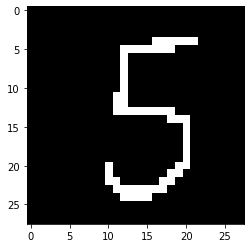

In [27]:
image = cv2.imread(f"Data/Numbers/5_second.jpg", cv2.IMREAD_GRAYSCALE) #Read it as grayscale (this drops two of the dimensions that coloured pictures have and leaves one pixel channel) 
image = cv2.resize(image, (28, 28)) 
image = np.asarray(image) # Saves the pixel intensity values as an np.array
thresh = 128
image = cv2.threshold(image, thresh, 255, cv2.THRESH_BINARY)[1]

plt.imshow(image, cmap="gray")

#### 3. Importing Pictures using Image.open and then Resizing and Changing Color using cv2.COLOR_BGR2GRAY

In [28]:
import cv2
from PIL import Image

for file_name, real_number in zip(file_names, real_numbers):
    
    image = Image.open(f"Data/Numbers/{file_name}.jpg")
    image = image.resize((28, 28)) # Shape is now (28, 28, 3)
    image = np.asarray(image) # Converts to array   
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # Changes the shape to (28, 28, 1)
    
    image = image.reshape((28*28,)) 
    image = image.reshape(1, -1)

    predicted_number = model_KNN.predict(image)
    print(f"Real: {real_number} Predicted: {predicted_number[0]}")

Real: 0 Predicted: 0
Real: 1 Predicted: 1
Real: 2 Predicted: 2
Real: 3 Predicted: 3
Real: 4 Predicted: 4
Real: 5 Predicted: 9
Real: 6 Predicted: 5
Real: 7 Predicted: 1
Real: 8 Predicted: 8
Real: 9 Predicted: 7
Real: 5 Predicted: 5
Real: 7 Predicted: 4
Real: 7 Predicted: 7


Missclassified: \
5 (only correctly classified the second time) \
6 \
7 (only correctly classified the last times) \
9

In general, this made the results worse. Interestingly, this is the first time the second 5 was correctly classified. For picture, see below. 

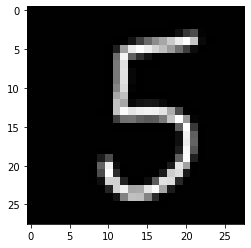

In [29]:
image = Image.open(f"Data/Numbers/5_second.jpg")
image = image.resize((28, 28)) # Shape is now (28, 28, 3)
image = np.asarray(image) # Converts to array   
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # Changes the shape to (28, 28, 1)

plt.imshow(image, cmap="gray")

### Plotting a 5 from the Test Set for Comparison

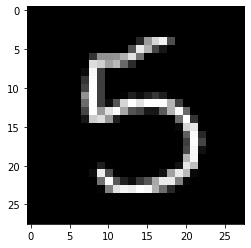

In [30]:
(_, _), (X_testing, _) = keras.datasets.mnist.load_data()

plt.imshow(X_testing[53], cmap="gray")

In [31]:
predicted_number = model_KNN.predict(X_testing[53].reshape(1,-1))
print(f"Predicted: {predicted_number[0]}")

Predicted: 5


We can see that the last of my hand written/drawn 5:s was more similar to the example 5 in the test data (which was correctly classified by the model.) However, in general, the model performed worse. 